![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Chicago Cab Fare Predictor using Linear Regression

Accurately predicting the cost of a taxi ride can provide valuable insights for both riders and service providers, enabling more informed decisions and better financial planning. In this project, we focus on building a **Linear Regression model** to predict taxi fares in **Chicago, Illinois**. By analyzing patterns in historical data, we aim to create a model that can reliably estimate the fare for a given trip.

The [dataset used in this project](https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv) is a **subset of the [City of Chicago Taxi Trips dataset](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew)**, specifically **focusing on a two-day period in May 2022**. This data contains key features such as trip distance, pickup/dropoff locations, and ride duration, which we will leverage to train our predictive model.

**Project Objectives:**

- **Dataset:** A cleaned and preprocessed subset of taxi trips over a two-day period in May 2022.

- **Model:** A Linear Regression model that predicts the fare based on input features like trip distance, time of day, and other relevant variables.

- **Goal:** To build an accurate fare predictor that can assist in understanding taxi fare dynamics in Chicago.

This project not only serves as a practical application of regression modeling but also offers insights into the pricing structure of taxi services in a major metropolitan area.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Part I: Initial Setup

## 1. Import Required Libraries

In [1]:
# General Imports
import io

# Data Processing
import numpy as np
import pandas as pd

# Machine Learning
import keras

# Data Visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

## 2. Load the Dataset

In [2]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [3]:
print(f"Shape of dataset: {chicago_taxi_dataset.shape}")

Shape of dataset: (31694, 18)


In [4]:
chicago_taxi_dataset.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


## 3. Update the Dataframe

From the loaded `chicago_taxi_dataset`, we are selecting only the relevant columns: `TRIP_MILES`, `TRIP_SECONDS`, `FARE`, `COMPANY`, `PAYMENT_TYPE`, and `TIP_RATE`.

In [5]:
# Update the DataFrame to use only specific columns from the dataset
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print(f"Total number of rows: {len(training_df.index)}")
print(f"Shape of dataset: {training_df.shape}\n\n")
training_df.head(200)

Total number of rows: 31694
Shape of dataset: (31694, 6)




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Part II: Dataset Exploration

## 1. View Descriptive Statistics of the Dataset

In Pandas, the `DataFrame.describe()` method is used to generate descriptive statistics of a DataFrame, providing a summary of the central tendency, dispersion, and shape of a dataset's distribution for numerical columns.

Here's what `DataFrame.describe()` typically returns for numerical columns:

- **Count:** The number of non-null values.
- **Mean:** The average of the values.
- **Std:** The standard deviation, which measures the amount of variation or dispersion.
- **Min:** The minimum value.
- **25%:** The 25th percentile (first quartile).
- **50%:** The 50th percentile (median or second quartile).
- **75%:** The 75th percentile (third quartile).
- **Max:** The maximum value.

For categorical or object data types, you can use `DataFrame.describe(include=['object'])`, and it will return:

- **Count:** The number of non-null entries.
- **Unique:** The number of unique values.
- **Top:** The most frequent value.
- **Freq:** The frequency of the most frequent value.

**Note 1**

The `DataFrame.describe()` method is useful for getting a quick overview of your data and identifying patterns or outliers.

**Note 2**

The `include='all'` argument ensures that both numerical and categorical data are included in the summary.

In [6]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


**Note**

You might be wondering why there are groups of `NaN` (not a number) values listed in the output. When working with data in Python, you may see this value if the result of a calculation can not be computed or if there is missing information. For example, in the taxi dataset `PAYMENT_TYPE` and `COMPANY` are non-numeric, categorical features; numeric information such as mean and max do not make sense for categorical features so the output displays `NaN`.

## 2. Dataset Analysis

Now we are going to analyze the subset of the Chicago Taxi Trips dataset using `pandas`. We'll answer specific questions about the dataset, such as the maximum fare, the mean trip distance, the number of cab companies, the most frequent payment type, and whether any features have missing data.

### Step 1: Finding the Maximum Fare

We use the `max()` function to find the maximum fare from the `FARE` column. This gives us the highest fare recorded in the dataset.

In [7]:
max_fare = training_df['FARE'].max()
print(f"Maximum Fare: ${max_fare:.2f}")

Maximum Fare: $159.25


### Step 2: Calculating the Mean Distance Across All Trips

The `mean()` function computes the average of all values in the `TRIP_MILES` column. This gives us the mean trip distance across all taxi rides in the dataset.

In [8]:
mean_distance = training_df['TRIP_MILES'].mean()
print(f"Mean Distance: {mean_distance:.2f} miles")

Mean Distance: 8.29 miles


### Step 3: Counting the Number of Cab Companies

Here, we use the `nunique()` function on the `COMPANY` column to determine the number of unique cab companies in the dataset.

In [9]:
num_unique_companies =  training_df['COMPANY'].nunique()
print(f"Number of Cab Companies: {num_unique_companies}")

Number of Cab Companies: 31


### Step 4: Identifying the Most Frequent Payment Type

The `value_counts()` function counts the occurrences of each payment type in the `PAYMENT_TYPE` column, and `idxmax()` returns the most frequent one. This helps us identify the most commonly used payment method for taxi rides.

In [10]:
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print(f"Most Frequent Payment Type: {most_freq_payment_type}")

Most Frequent Payment Type: Credit Card


### Step 5: Checking for Missing Data

We use the `isnull().sum().sum()` chain to check for missing values. First `isnull()` returns a DataFrame of boolean values indicating where data is missing. `sum()` counts the number of missing values per column, and another `sum()` aggregates this count across all columns. If the result is 0, there are no missing values; otherwise, there are missing entries in the dataset.

In [11]:
n_missing_values = training_df.isnull().sum().sum()
print(f"Number of Missing Values: {n_missing_values}")
is_missing = "Yes" if n_missing_values > 0 else "No"
print(f"Are any features missing data?\t{is_missing}")

Number of Missing Values: 0
Are any features missing data?	No


## 3. Generate Correlation Matrix

In this section, we'll generate and analyze a correlation matrix to understand which features in the dataset are most closely related to our target variable, `FARE`. Correlation measures the strength of the linear relationship between two variables, with values ranging from -1 to 1. A value closer to 1 or -1 indicates a strong relationship, while values near 0 indicate a weak or no relationship.

Correlation values have the following meanings:

- **1.0:** Perfect **positive correlation** — when one attribute increases, the other attribute also increases.

- **-1.0:** Perfect **negative correlation** — when one attribute increases, the other attribute decreases.

- **0.0:** **No correlation** — the two attributes are not linearly related.

In general, the **higher the absolute value** of a correlation, the **greater its predictive power**.

### Step 1: View the Correlation Matrix

The `corr()` function is used to compute the pairwise correlation of the features in the dataset. We pass `numeric_only=True` to limit the correlation calculation to numeric columns. This matrix shows how strongly each feature is related to one another and to the target label, `FARE`.

In [12]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


### Step 2: Identify the Feature with the Strongest Correlation to the Label `FARE`

From the correlation matrix, we can see that `TRIP_MILES` has the strongest positive correlation with `FARE`. This indicates that longer trips (in miles) tend to result in higher fares, which is expected. Additionally, `TRIP_SECONDS` (trip duration) also shows a strong correlation with the fare, meaning that both distance and time are important factors in predicting fare.

### Step 3: Identify the Feature with the Weakest Correlation to the Label `FARE`

The feature with the weakest correlation to the label `FARE` is `TIP_RATE`. This suggests that the amount tipped does not strongly influence the base fare, which makes sense because tips are generally independent of the fare amount and are often influenced by other factors like service quality.

## 4. Visualize Relationships in the Dataset

To better understand the relationships between features in the dataset, we can visualize them using a pair plot. A pair plot generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.This helps us spot potential correlations or trends between variables, which might not be immediately obvious from numerical data alone.

In this case, we are plotting the following features: `FARE`, `TRIP_MILES`, and `TRIP_SECONDS`.

Each pair plot shows a scatter plot of the relationship between two features, allowing us to observe how one feature changes as the other changes. Diagonal plots show the distribution of individual features, while off-diagonal plots show the relationships between different features.

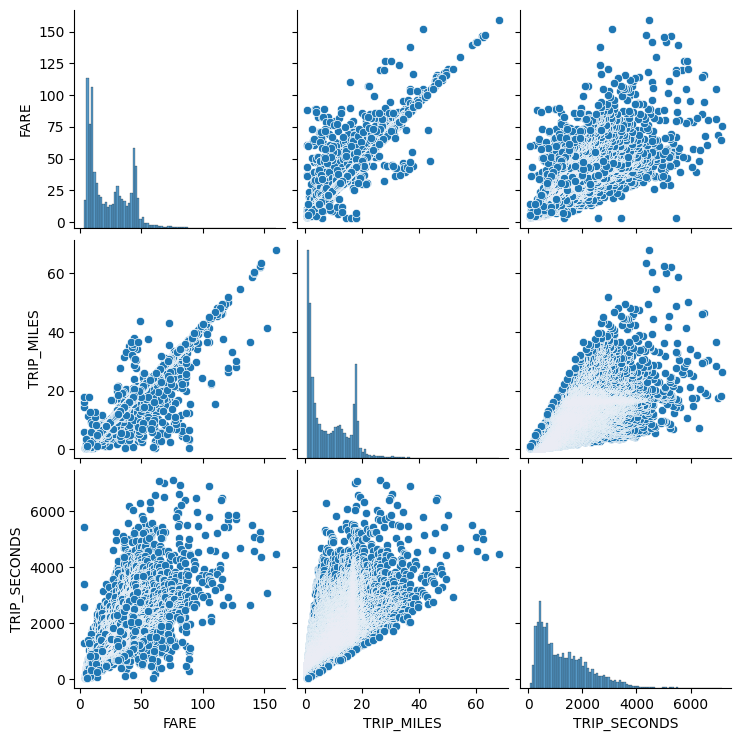

In [13]:
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

**Note**

Using pair plots, we can quickly visualize any potential linear relationships, clusters, or outliers in the data, which will help guide our next steps in feature selection and model building.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Part III: Train the Model

## 1. Define Plotting Functions

In this subsection, we define custom plotting functions to help visualize the model's performance, the relationship between features, and how the model's predictions compare to the actual data.

### Step 1: Define the `make_plots` Function

The `make_plots` function generates a visual representation of the training process. It takes a sample from the data and plots both the model's predictions and the actual data. The function includes:

- A **scatter plot or surface plot** for visualizing the relationship between features and the label.

- A **loss curve** to show the model's error reduction over epochs.

In [15]:
!pip3 install kaleido

In [112]:
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_plots(df, feature_names, label_name, model_output, model_info_text, png_file_path, sample_size=200):
    # Ensure the directory for saving the plot exists
    directory = os.path.dirname(png_file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Random sample for plotting
    random_sample = df.sample(n=sample_size).copy()
    random_sample.reset_index()

    # Model parameters from the output
    weights, bias, epochs, rmse = model_output

    # Determine plot type (2D or 3D)
    is_2d_plot = len(feature_names) == 1
    model_plot_type = "scatter" if is_2d_plot else "surface"

    # Create subplots (2 columns: Loss Curve and Model Plot)
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Loss Curve", "Model Plot"),
        specs=[[{"type": "scatter"}, {"type": model_plot_type}]]
    )

    # Plot data and model
    plot_data(random_sample, feature_names, label_name, fig)
    plot_model(random_sample, feature_names, weights, bias, fig)
    plot_loss_curve(epochs, rmse, fig)

    # Increase the size of the entire figure
    fig.update_layout(
        margin=dict(r=250),  # Increase the right margin to provide space for the text
        width=1300,  # Increase the figure's overall width
        height=600   # Keep the height consistent
    )

    # Add a rectangle to the right of the Model Plot for the text
    fig.add_shape(
        type="rect",
        xref="paper", yref="paper",
        x0=1.025, x1=1.25,  # Adjusted for space on the right
        y0=0, y1=1,
        line=dict(color="black", width=1),
        fillcolor="lightgray",
        opacity=0.5,
    )

    # Add the model_info text as an annotation inside the rectangle
    fig.add_annotation(
        text=model_info_text.replace("\n", "<br>"),  # Convert newlines to HTML line breaks
        align="left",
        xref="paper", yref="paper",
        x=1.245,  # Position within the rectangle
        y=0.5,   # Center vertically in the rectangle
        showarrow=False,
        font=dict(size=12),
        bordercolor="black",
        borderwidth=0,
        bgcolor="lightgray",
        opacity=1,
    )

    # Update layout to prevent text from overlapping plot
    # fig.update_layout(
    #     margin=dict(r=200)  # Add more space on the right for the text box
    # )

    # Save the plot as a PNG file
    fig.write_image(png_file_path)

    return

In [17]:
# import os
# import plotly.graph_objects as go

# def make_plots(df, feature_names, label_name, model_output, model_info_text, png_file_path, sample_size=200):
#     # Ensure the directory for saving the plot exists
#     directory = os.path.dirname(png_file_path)
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     # Random sample for plotting
#     random_sample = df.sample(n=sample_size).copy()
#     random_sample.reset_index()

#     # Model parameters from the output
#     weights, bias, epochs, rmse = model_output

#     # Determine plot type (2D or 3D)
#     is_2d_plot = len(feature_names) == 1
#     model_plot_type = "scatter" if is_2d_plot else "surface"

#     # Create subplots (2 columns: Loss Curve and Model Plot)
#     fig = make_subplots(
#         rows=1, cols=2,
#         subplot_titles=("Loss Curve", "Model Plot"),
#         specs=[[{"type": "scatter"}, {"type": model_plot_type}]]
#     )

#     # Plot data and model
#     plot_data(random_sample, feature_names, label_name, fig)
#     plot_model(random_sample, feature_names, weights, bias, fig)
#     plot_loss_curve(epochs, rmse, fig)

#     # Add the model_info text as an annotation on the right side of the "Model Plot"
#     fig.add_annotation(
#         text=model_info_text,  # The text to display (formatted by model_info())
#         align="left",
#         xref="paper", yref="paper",
#         x=1.15,  # Position on the right side of the plot
#         y=0.5,
#         showarrow=False,
#         font=dict(size=10),
#         bordercolor="black",
#         borderwidth=1,
#         borderpad=4,
#         bgcolor="white",
#         opacity=0.8
#     )

#     # Save the plot as a PNG file
#     fig.write_image(png_file_path)

#     return

### Step 2: Define the `plot_loss_curve` Function

The plot_loss_curve function generates a plot of the **Root Mean Squared Error (RMSE)** over the epochs. This helps us visualize how well the model improves its predictions as training progresses.

- **x-axis:** Epoch number.

- **y-axis:** RMSE (a measure of error).

In [18]:
def plot_loss_curve(epochs, rmse, fig):
    curve = px.line(x=epochs, y=rmse)
    curve.update_traces(line_color='#ff0000', line_width=3)

    fig.append_trace(curve.data[0], row=1, col=1)
    fig.update_xaxes(title_text="Epoch", row=1, col=1)
    fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

    return

### Step 3: Define the `plot_data` Function

The plot_data function visualizes the **actual data points**. Depending on the number of features, it generates either:

- A **2D scatter plot** if there's a single feature.

- A **3D scatter plot** for two features, with the label on the z-axis.

In [19]:
def plot_data(df, features, label, fig):
    if len(features) == 1:
        scatter = px.scatter(df, x=features[0], y=label)
    else:
        scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

    fig.append_trace(scatter.data[0], row=1, col=2)
    if len(features) == 1:
        fig.update_xaxes(title_text=features[0], row=1, col=2)
        fig.update_yaxes(title_text=label, row=1, col=2)
    else:
        fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

    return

### Step 4: Define the `plot_model` Function

The `plot_model` function generates a **prediction line** (for 1 feature) or a **prediction plane** (for 2 features) based on the model's learned weights and bias. It visualizes how well the model fits the actual data.

In [20]:
def plot_model(df, features, weights, bias, fig):
    df['FARE_PREDICTED'] = bias[0]

    for index, feature in enumerate(features):
        df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

    if len(features) == 1:
        model = px.line(df, x=features[0], y='FARE_PREDICTED')
        model.update_traces(line_color='#ff0000', line_width=3)
    else:
        z_name, y_name = "FARE_PREDICTED", features[1]
        z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
        y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
        x = []
        for i in range(len(y)):
            x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

        plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

        light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
        model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

    fig.add_trace(model.data[0], row=1, col=2)

    return

### Step 5: Define the `model_info` Function

The `model_info` function provides a textual summary of the model, including:

- **Weights** for each feature.
- The **bias** term.
- A formatted equation that represents the linear model based on the features.

In [115]:
def model_info(feature_names, label_name, model_output):
    weights = model_output[0]
    bias = model_output[1]

    nl = "\n"
    info = ""
    equation = label_name + " = "

    for index, feature in enumerate(feature_names):
        info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
        equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

    info = info + "Bias: {:.3f}\n".format(bias[0])
    equation = equation + "{:.3f}\n".format(bias[0])

    text = "Equation of the model is given below:\n"

    return info + nl + text + nl + equation

## 2. Define ML Functions

In this subsection, we define essential machine learning functions to build, train, and evaluate a Linear Regression model.

### Step 1: Define the `build_model` Function

The `build_model` function creates and compiles a simple linear regression model using Keras. This function sets up a sequential model with a single dense layer. The key parameters include:

- **Units:** Defines the number of output neurons (set to 1 for linear regression).

- **Input Shape:** Specifies the number of features (independent variables).

- **Optimizer:** RMSProp is used here to minimize the model's loss, which is defined as the mean squared error.

In [22]:
def build_model(my_learning_rate, num_features):
    """Create and compile a simple linear regression model."""
    # Most simple keras models are sequential.
    model = keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(keras.layers.Dense(units=1,
                                    input_shape=(num_features,)))

    # Compile the model topography into code that Keras can efficiently
    # execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                    loss="mean_squared_error",
                    metrics=[keras.metrics.RootMeanSquaredError()])

    return model

### Step 2: Define the `train_model` Function

The `train_model` function handles the training process for the model by feeding it the input features and corresponding labels. Key elements:

- **Batch size:** Specifies the number of samples to work through before updating the model's internal parameters.

- **Epochs:** Refers to the number of complete passes through the training dataset.

The function returns the learned **weights**, **bias**, the list of **epochs**, and the **root mean squared error (RMSE)** at each epoch.

In [23]:
def train_model(model, df, features, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs.
    # input_x = df.iloc[:,1:3].values
    # df[feature]
    history = model.fit(x=features,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

### Step 3: Define the `run_experiment` Function

The `run_experiment` function orchestrates the entire training process. It builds the model, trains it on the given features and labels, and produces the model's output:

- **model_output:** A tuple containing the learned weights, bias, epochs, and RMSE.
    
- **make_plots:** This function is called to visualize the training results, including the loss curve and the model’s predictions.

By running this function, we can analyze the model's behavior and check how well it fits the data based on the chosen features.

In [30]:
def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size, png_filepath):

    print('INFO: Starting Training Experiment with features={} and label={}\n'.format(feature_names, label_name))

    num_features = len(feature_names)

    features = df.loc[:, feature_names].values
    label = df[label_name].values

    model = build_model(learning_rate, num_features)
    model_output = train_model(model, df, features, label, epochs, batch_size)

    print('\nSUCCESS: Training Experiment Completed\n')

    nl = "\n"
    header = "-" * 80
    banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header
    print('{}'.format(banner))

    model_info_text = model_info(feature_names, label_name, model_output)
    print('{}'.format(model_info_text))

    make_plots(df, feature_names, label_name, model_output, model_info_text, png_filepath)

    return model

## 3. Train the Model with One Feature

In this section, we will train our model using a single feature, `TRIP_MILES`, and examine how hyperparameters like the learning rate, batch size, and number of epochs impact model performance.

### Experiment 1: Initial Training with One Feature

In this experiment, we use `TRIP_MILES` as the sole feature to predict `FARE`. The initial hyperparameters are set as:

- **Learning Rate:** 0.001
- **Epochs:** 20
- **Batch Size:** 50

This experiment provides a baseline for how the model performs with these hyperparameters. After running the model, we can evaluate its behavior and convergence.

In [116]:
# Experiment 1: Initial Training with One Feature
learning_rate = 0.001
epochs = 20
batch_size = 50
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size, "results/experiment_01/model_plots.png")

INFO: Starting Training Experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1570.9946 - root_mean_squared_error: 39.6226
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1043.2108 - root_mean_squared_error: 32.2818
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 633.4401 - root_mean_squared_error: 25.1466
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 326.7186 - root_mean_squared_error: 18.0427
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 125.6506 - root_mean_squared_error: 11.1654
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26.8518 - root_mean_squared_error: 5.1512
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.0317 - root_mean_squared_error: 3.9846
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.8561 - root_mean_squared_error: 4.0930
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.5842 - root_mean_squared_error: 3.6797
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1041 - root_mean_

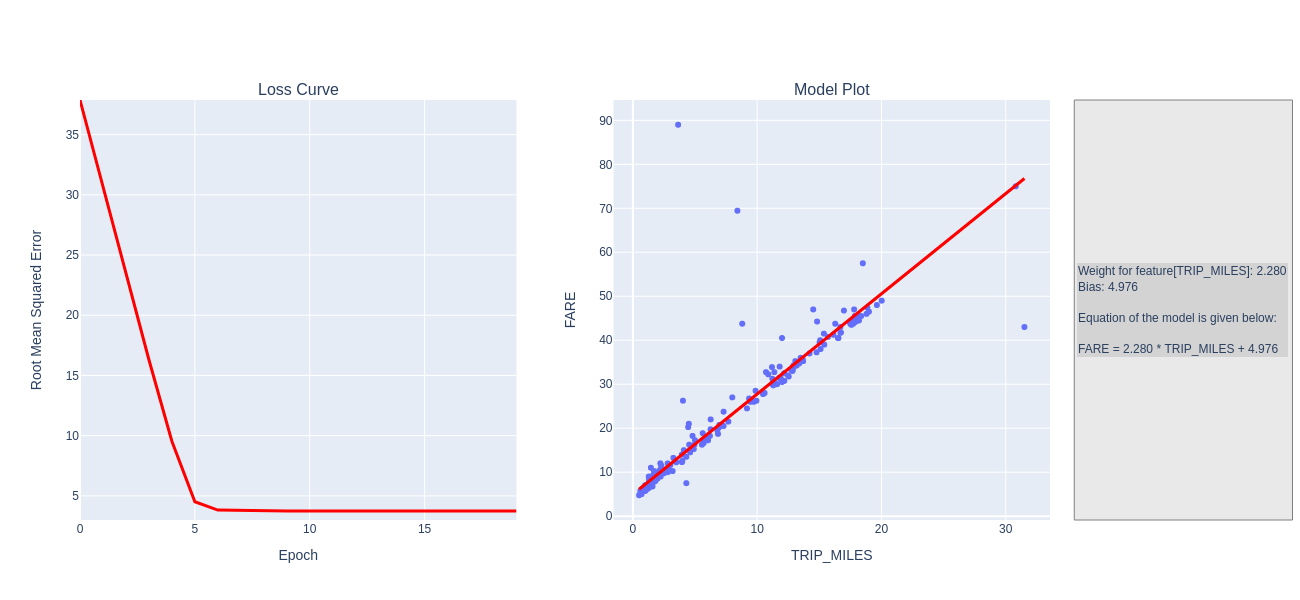

In [117]:
# Experiment 1: Initial Training with One Feature

from IPython import display
display.Image("results/experiment_01/model_plots.png")

#### 1. How many epochs did it take to converge on the final model?

We observe that the model converges after approximately 5 epochs, as evidenced by the leveling off of the loss curve.

#### 2. How well does the model fit the sample data?

Upon visualizing the model plot, the model seems to fit the sample data adequately. Further experiments will help refine the model performance.

### Experiment 2: Very High Learning Rate

In this second experiment, we will test how a very high learning rate affect model performance. This experiment keeps the same feature (`TRIP_MILES`) but uses a very high learning rate of 0.5 for comparison.

In [126]:
# Experiment 2: Very High Learning Rate
learning_rate = 0.5
epochs = 20
batch_size = 50
features = ['TRIP_MILES']
label = 'FARE'

model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size, "results/experiment_02/model_plots.png")

INFO: Starting Training Experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55.9279 - root_mean_squared_error: 6.6186
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.2476 - root_mean_squared_error: 5.0161
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.8920 - root_mean_squared_error: 4.6757
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.9131 - root_mean_squared_error: 4.8798
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.9481 - root_mean_squared_error: 4.6743
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.7006 - root_mean_squared_error: 4.6503
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.6739 - root_mean_squared_error: 4.8576
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.0331 - root_mean_squared_error: 4.7956
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.0127 - root_mean_squared_error: 4.8976
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.8649 - root_mean_squared_erro

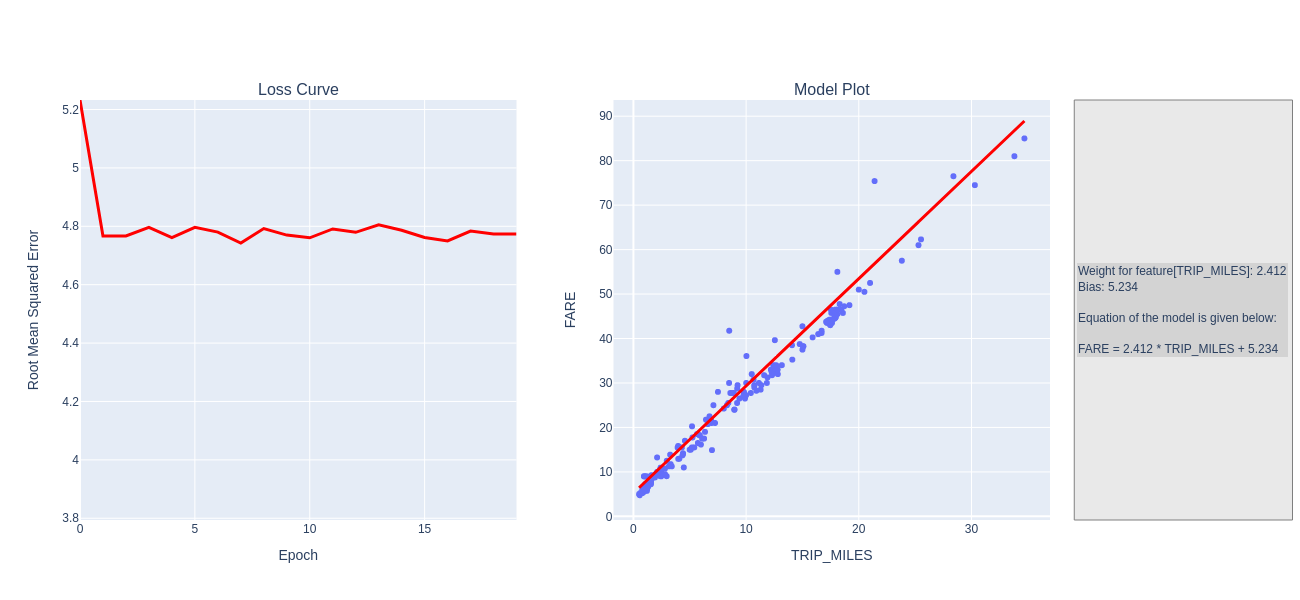

In [127]:
# Experiment 2: Very High Learning Rate

from IPython import display
display.Image("results/experiment_02/model_plots.png")

#### 1. How did raising the learning rate impact your ability to train the model?

When the learning rate is too high, the loss curve bounces around and does not appear to be moving towards convergence with each iteration. Also, notice that the predicted model does not fit the data very well. With a learning rate that is too high, it is unlikely that you will be able to train a model with good results.

Raising the learning rate can have significant effects on model training:

1. **Faster Initial Learning:** With a higher learning rate, the model makes larger updates to the weights during each iteration. This can lead to faster initial reductions in the loss, which means the model may converge more quickly in the beginning stages of training.

2. **Instability in Training:** If the learning rate is too high, the model might overshoot the optimal solution, causing the loss to fluctuate wildly and potentially preventing convergence. The loss curve will appear more erratic, bouncing up and down without settling into a downward trend.

3. **Failure to Converge:** When the learning rate is raised too much, the model might not be able to converge at all. It will oscillate around the optimal weights without reaching them, or it may diverge entirely, causing the loss to increase with each epoch.

4. **Lower Accuracy:** With a high learning rate, the model might not learn the fine details of the dataset because it is making large updates, which prevents it from learning subtle patterns. As a result, the model might not generalize well to unseen data, leading to poor performance on the validation or test sets.

5. **Faster Training but Poor Results:** While raising the learning rate might result in faster training (i.e., fewer epochs to reduce the loss initially), it can come at the cost of accuracy and generalization. The model might not settle on a good set of weights, leading to a poor fit of the data and suboptimal predictions.

In summary, increasing the learning rate can speed up the training process, but if set too high, it can lead to unstable training and prevent the model from finding the optimal solution. Balancing the learning rate is crucial to ensure effective training without sacrificing the model's accuracy and generalization.

### Experiment 3: Very Low Learning Rate

In this third experiment, we will test how a very low learning rate affect model performance. This experiment keeps the same feature (`TRIP_MILES`) but uses a very low learning rate of 0.0001 for comparison.

In [128]:
# Experiment 3: Very Low Learning Rate
learning_rate = 0.0001
epochs = 20
batch_size = 50
features = ['TRIP_MILES']
label = 'FARE'

model_3 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size, "results/experiment_03/model_plots.png")

INFO: Starting Training Experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 536.6067 - root_mean_squared_error: 23.1643
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 510.2615 - root_mean_squared_error: 22.5881
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 475.2817 - root_mean_squared_error: 21.7991
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 447.3405 - root_mean_squared_error: 21.1495
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 417.1108 - root_mean_squared_error: 20.4229
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 382.3817 - root_mean_squared_error: 19.5542
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 359.9754 - root_mean_squared_error: 18.9723
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 334.6152 - root_mean_squared_error: 18.2917
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 308.7973 - root_mean_squared_error: 17.5715
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 284.8015 - roo

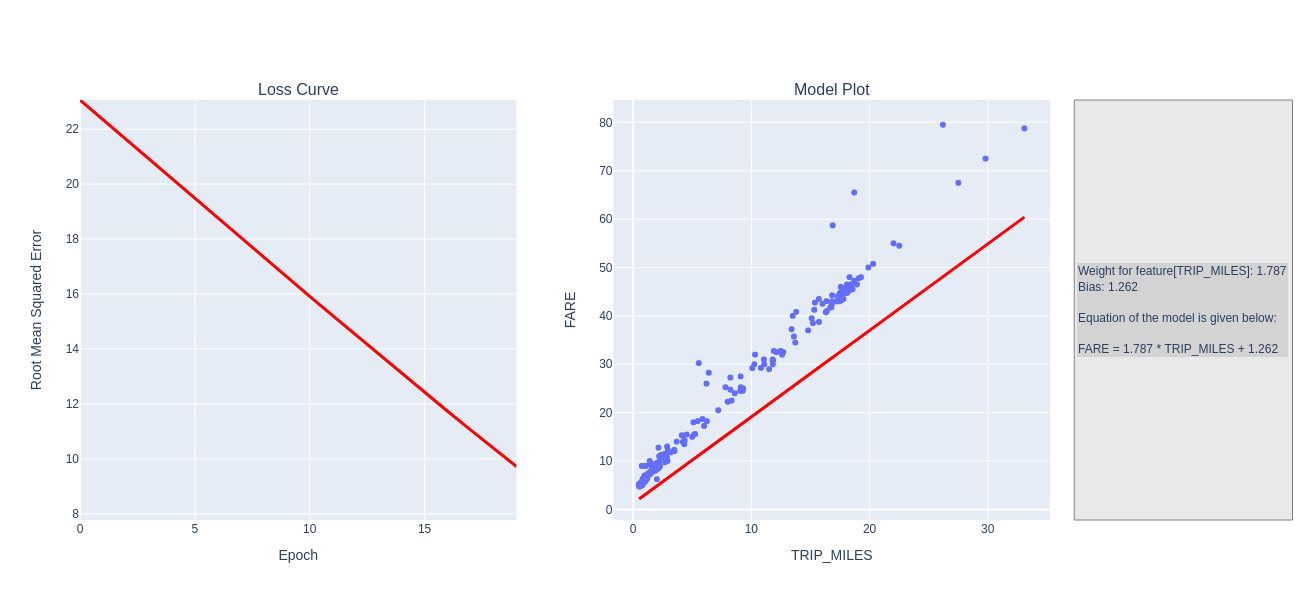

In [129]:
# Experiment 3: Very Low Learning Rate

from IPython import display
display.Image("results/experiment_03/model_plots.png")

#### 1. How did lowering the learning rate impact your ability to train the model?

When the learning rate is too small, it may take longer for the loss curve to converge. With a small learning rate the loss curve decreases slowly, but does not show a dramatic drop or leveling off. With a small learning rate you could increase the number of epochs so that your model will eventually converge, but it will take longer.

Lowering the learning rate affects model training in several ways:

1. **Slower Convergence:** A lower learning rate means that the model updates its weights more gradually. This results in smaller steps toward the optimal solution, which often translates to slower convergence. The loss decreases more slowly over epochs, requiring more iterations to reach the final model.

2. **Improved Stability:** With a lower learning rate, the model's training process becomes more stable. The updates to the weights are less aggressive, reducing the risk of overshooting the optimal solution and avoiding large fluctuations in the loss curve. This often results in a smoother and more predictable decrease in loss.

3. **Potential for Better Accuracy:** While training might take longer, a lower learning rate allows the model to fine-tune its weights more precisely. This can help in finding a more accurate solution, potentially improving the final model's performance and generalization on unseen data.

4. **Risk of Getting Stuck in Local Minima:** If the learning rate is too low, the model might converge to a local minimum rather than finding the global optimum. Although the training process is stable, the model might not achieve the best possible performance if it gets stuck in suboptimal areas of the loss landscape.

5. **Need for More Epochs:** To compensate for the slower convergence, you may need to increase the number of epochs to allow the model sufficient time to learn. Without enough epochs, the model may not fully converge, resulting in incomplete training.

In summary, lowering the learning rate can lead to more stable training and potentially better model performance, but it comes at the cost of slower convergence. It's important to balance the learning rate and the number of epochs to ensure that the model trains effectively without excessive computation time.

### Experiment 4: High Batch Size

In this fourth experiment, we will test how a high batch size affect model performance. This experiment keeps the same feature (`TRIP_MILES`) but uses a high batch size of 100 for comparison.

In [130]:
# Experiment 4: High Batch Size
learning_rate = 0.001
epochs = 20
batch_size = 100
features = ['TRIP_MILES']
label = 'FARE'

model_4 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size, "results/experiment_04/model_plots.png")

INFO: Starting Training Experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1845.6700 - root_mean_squared_error: 42.9576
Epoch 2/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1570.1018 - root_mean_squared_error: 39.6165
Epoch 3/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1268.3445 - root_mean_squared_error: 35.6095
Epoch 4/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1027.0049 - root_mean_squared_error: 32.0402
Epoch 5/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 794.7828 - root_mean_squared_error: 28.1886
Epoch 6/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 614.5046 - root_mean_squared_error: 24.7814
Epoch 7/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 448.3399 - root_mean_squared_error: 21.1655
Epoch 8/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 307.4725 - root_mean_squared_error: 17.5247
Epoch 9/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 189.9434 - root_mean_squared_error: 13.7735
Epoch 10/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 108.8180 -

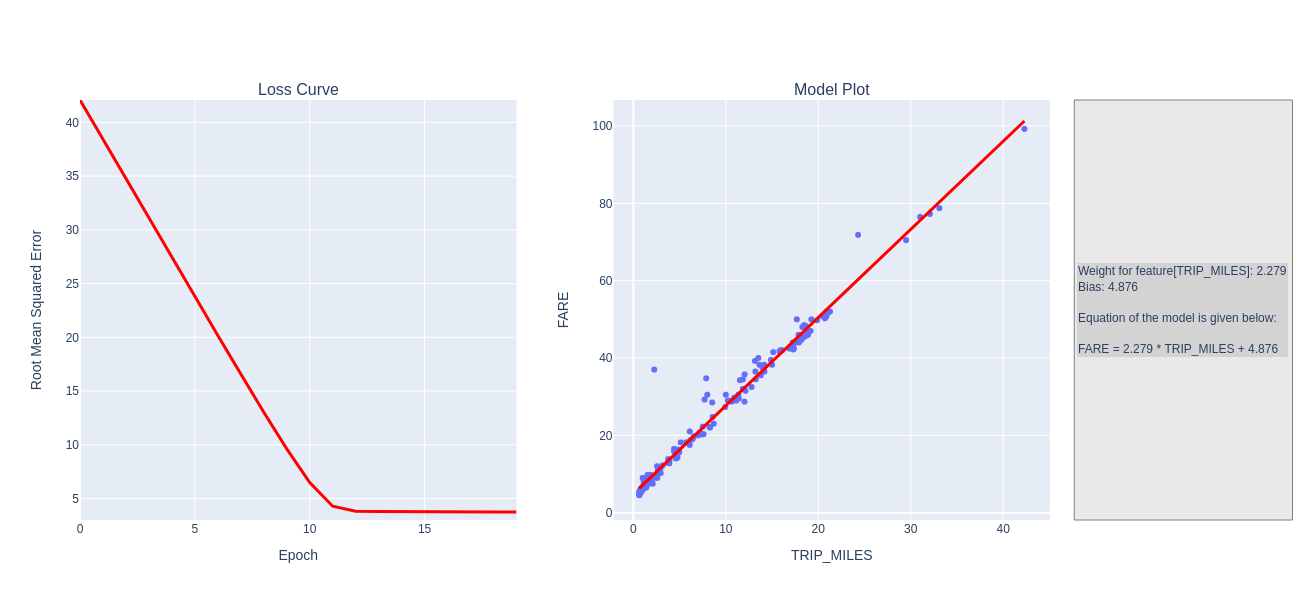

In [131]:
# Experiment 4: High Batch Size

from IPython import display
display.Image("results/experiment_04/model_plots.png")

#### 1. How did increasing the batch size affect your training results?

Increasing the batch size makes each epoch run faster, but as with the smaller learning rate, it may require more epochs to converge. Here, the model converged after 11 epochs whereas in Experiment 1, we got convergence after 5 epochs.

Increasing the batch size can have the following effects on training:

1. **Smoother Gradient Descent:** A larger batch size results in a more accurate estimation of the gradient because it is based on a larger portion of the dataset. This leads to a smoother loss curve with less fluctuation, and more stable updates to the model's weights.

2. **Faster Convergence per Epoch:** Since the gradients are computed more accurately, the model can converge faster in terms of how quickly the loss decreases over each epoch. However, this doesn't necessarily mean the model will converge to a better solution in fewer epochs.

3. **Less Frequent Weight Updates:** With a larger batch size, the model performs fewer weight updates per epoch. This means the learning process is slower in terms of the number of updates made during training, but each update is based on more information, so it may be more reliable.

4. **Potential Risk of Overfitting:** Larger batch sizes can sometimes lead to overfitting, especially if the dataset is small. Since the gradient estimates are based on a large amount of data, the model may find it easier to memorize the training data rather than generalize well to unseen data.

5. **Training Efficiency:** Using a larger batch size may speed up the training process per epoch due to the parallelism enabled in modern hardware like GPUs. However, increasing the batch size too much can lead to diminishing returns, as hardware memory limitations might prevent further scaling.

6. **Less Generalization:** Large batch sizes might lead to poorer generalization on unseen data. Since the weight updates are more accurate, the model may not explore enough alternative solutions, potentially settling on a less general solution.

In practice, increasing the batch size can be a useful strategy for speeding up training and achieving smoother learning curves. However, care must be taken as excessively large batch sizes can reduce generalization and may require more epochs to achieve optimal results.

### Experiment 5: Low Batch Size

In this fifth experiment, we will test how a low batch size affect model performance. This experiment keeps the same feature (`TRIP_MILES`) but uses a low batch size of 5 for comparison.

In [132]:
# Experiment 5: Low Batch Size
learning_rate = 0.001
epochs = 20
batch_size = 5
features = ['TRIP_MILES']
label = 'FARE'

model_5 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size, "results/experiment_05/model_plots.png")

INFO: Starting Training Experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6339/6339 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 115.1565 - root_mean_squared_error: 10.2441
Epoch 2/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 14.7248 - root_mean_squared_error: 3.8307
Epoch 3/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 15.8381 - root_mean_squared_error: 3.9641
Epoch 4/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 14.8734 - root_mean_squared_error: 3.8533
Epoch 5/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 14.0335 - root_mean_squared_error: 3.7419
Epoch 6/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 15.0656 - root_mean_squared_error: 3.8761
Epoch 7/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 13.5845 - root_mean_squared_error: 3.6673
Epoch 8/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 14.2728 - root_mean_squared_error: 3.7680
Epoch 9/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 14.3196 - root_mean_squared_error: 3.7756
Epoch 10/20
6339/6339 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 12.7

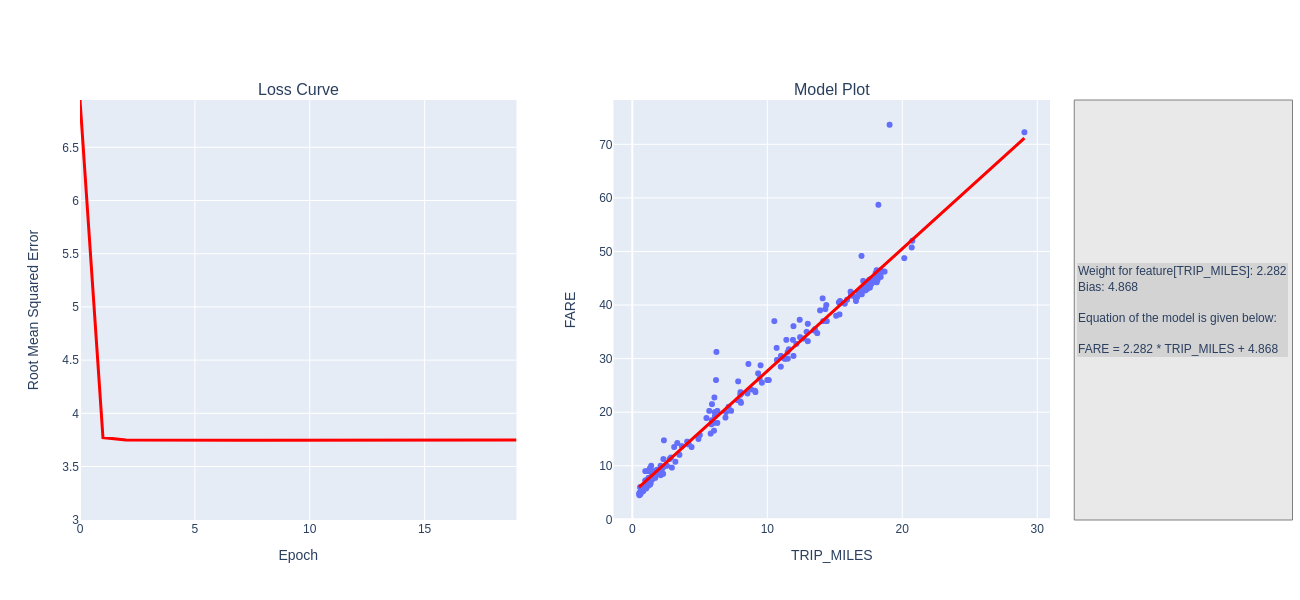

In [133]:
# Experiment 5: Low Batch Size

from IPython import display
display.Image("results/experiment_05/model_plots.png")

#### 1. How did reducing the batch size affect your training results?

Reducing the batch size can have the following effects on training:

1. **More Frequent Updates to Model Weights:** A smaller batch size leads to more frequent updates to the model's weights during training. Since gradients are updated more frequently, this can lead to faster initial improvements in the model's performance.

2. **More Noisy Gradient Descent:** However, with a smaller batch size, each update to the model's weights is based on fewer data points, which makes the gradient estimation noisier. This means that the model's loss curve might fluctuate more and not decrease as smoothly.

3. **Slower Convergence:** The increased noise in gradient estimation can slow down the overall convergence of the model, and you may require more epochs for the model to reach optimal performance.

4. **Better Generalization:** Interestingly, despite slower convergence, smaller batch sizes can sometimes lead to better generalization on unseen data. This is because the noise in the gradient updates forces the model to explore a more diverse set of solutions, which may help avoid overfitting to the training data.

5. **Training Speed:** While each epoch processes fewer samples per iteration, smaller batch sizes increase the total number of iterations required to process the entire dataset. As a result, training with a small batch size might take longer in terms of overall time.

In practice, reducing the batch size can be a useful strategy if the model is overfitting, or if you want to improve generalization, but it may come with the trade-off of slower training time and noisier convergence.

## 4. Train the Model with Two Features

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)